**According to Wikipedia**, Opinion mining (sometimes known as sentiment analysis or emotion AI) refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. Sentiment analysis is widely applied to voice of the customer materials such as reviews and survey responses, online and social media, and healthcare materials for applications that range from marketing to customer service to clinical medicine.

![sentiments](https://s3.amazonaws.com/com.twilio.prod.twilio-docs/images/SentimentAnalysis.width-800.png)

Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material, and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. Apart for the perspective of marketing, sentiment analysis can also be used for tagging online literature that conveys wrong message or tries to spread hatred in the community.

Sentiment Analysis is one of the core part of Natural Language Processing and just like any other domain of Data Science and Machine Learning it's quite challenging for the beginners to find an appropriate starting point.

In this kernel I have tried to address some of the problems that I faced when I first entered in field of NLP.
In my upcoming kernels I'll be sharing some common guidelines and information about the tools that will make your life a bit easier during your beginning.

# Let's Begin


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Dataset 

Dataset that I have used contains variety of tweets and our objective is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist.

# Motivation

Hate  speech  is  an  unfortunately  common  occurrence  on  the  Internet.  Often social media sites like Facebook and Twitter face the problem of identifying and censoring  problematic  posts  while weighing the right to freedom of speech. The  importance  of  detecting  and  moderating hate  speech  is  evident  from  the  strong  connection between hate speech and actual hate crimes. Early identification of users promoting  hate  speech  could  enable  outreach  programs that attempt to prevent an escalation from speech to action.

In [2]:
df = pd.read_csv('../input/train.csv')
df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


<h3>Let's start our solution with some basic exploratory data analysis and try do dig some insights from the dataset.</h3>


First let's divide our dataset into two part, first one contains positive tweets and the other one containing negative tweets i.e. tweets with racist/ sexist remarks

In [3]:
train_pos = df[df['label'] == 0]
train_neg = df[df['label'] == 1]

Now lets  clean the tweets from hashtags, mentions and links

In [4]:
def clean_word(data):
    words = " ".join(data['tweet'])
    
    cleaned_words = " ".join([word for word in words.split() 
                             if 'http' not in word
                             and not word.startswith('@')
                             and not word.startswith('#')
                             and word != 'RT'])
    return cleaned_words

In [5]:
pos_clean_words = clean_word(train_pos)
neg_clean_words = clean_word(train_neg)

Now we are ready for a WordCloud visualization which shows only the most emphatic words of the Positive and Negative tweets.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS

Stopwords are some of the most frequently occuring words e.g. 'a','an','the'. They does not give any significant information regarding the content and context of text.

[Check out this link for more information.](https://en.wikipedia.org/wiki/Stop_words)

In [7]:
def wcloud(cleaned_words):
    wordcloud = WordCloud(stopwords=STOPWORDS,
                         background_color='black',
                         width=3000,
                          height=2500
                         ).generate(cleaned_words)
    return wordcloud

In [8]:
pos_wcloud = wcloud(pos_clean_words)
neg_wcloud = wcloud(neg_clean_words)

Non racist tweets


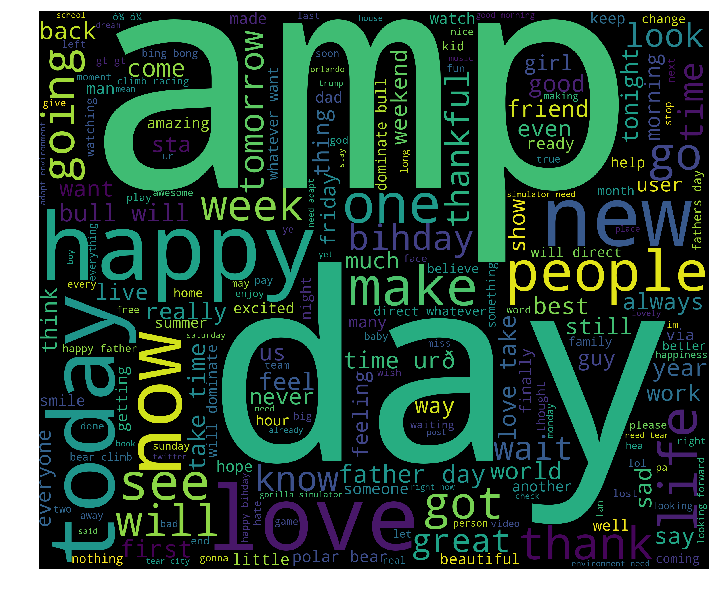

In [9]:
print('Non racist tweets')

plt.figure(1,figsize=(12,12))
plt.imshow(pos_wcloud)
plt.axis('off')
plt.show()

We can see that for the positive tweets most commonly occuring words are **'amp','happy','day','love',** etc. and most of this word doesn't conveys any racist sentiments

Racist tweets


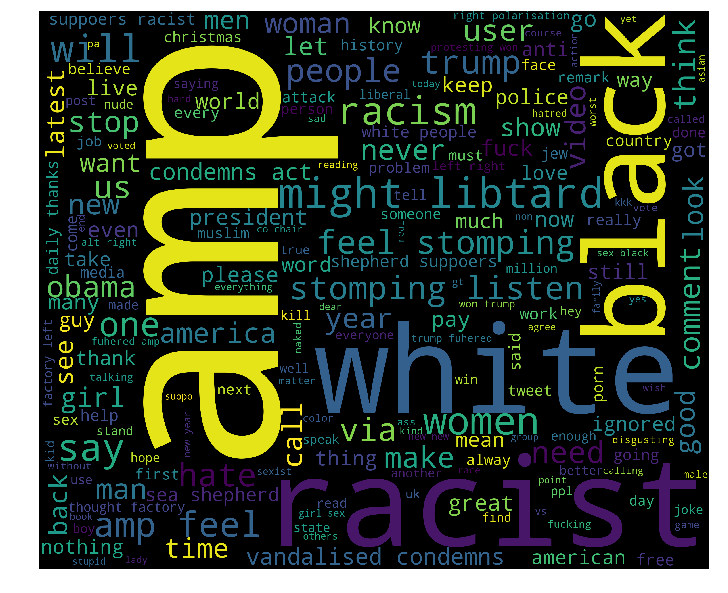

In [10]:
print('Racist tweets')

plt.figure(1,figsize=(12,12))
plt.imshow(neg_wcloud)
plt.axis('off')
plt.show()

We can see that the negative tweets has most common occuring words such as 'racist','black','libtard' even 'trump'(:p which is funny though :P)

**One important insight that we can draw from the visualization is that the word 'amp' has a significant presence in positive as well as in negative tweets, hence we have to take care of this as it may confuse our classifier**

One last thing that we would be exploring is distribution of our dataset

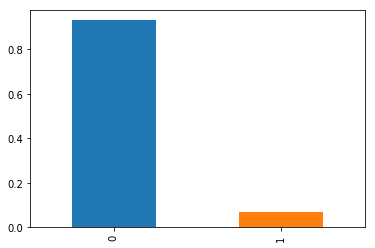

In [11]:
df['label'].value_counts(normalize = True).plot.bar()

We can see our dataset is highly skewed, we will have to take care of this.

But we won't be going in much details of on how to deal with skewed data as the main motive of this kernel is to give you a starting point for performing sentiment analysis.

[You can check out this link for more information regarding handling of skewed data](https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55)

Now we done with our exploratory data analysis.

# It's time for us to perform some data preprocessing before we can use it for training our classifier.


In [12]:
import re
import nltk
from nltk.corpus import stopwords

We will using [Regular Expression](https://docs.python.org/3/howto/regex.html) for removing special characters eg. '@','#', etc.

In [13]:
def clean_tweet_words(tweet):
    alpha_only = re.sub("[^a-zA-Z]",' ',tweet) #"[^a-zA-Z]" this regex will remove any non-alphabetical char as they are not significant
    words = alpha_only.lower().split()
    stop = set(stopwords.words('english'))
    #from the dataframe we can see 'user' word is quite common in the tweets, which is basically used for tagging someone in the tweet
    #so I will be removing that
    stop.add('user')
    sig_words = [word for word in words if not word in stop]
    return(" ".join(sig_words))

In [14]:
df['clean_tweet']  = df['tweet'].apply(lambda tweet: clean_tweet_words(tweet))

df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare big talking leave chaos pay disp...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0,the next school year is the year for exams.ð...,next school year year exams think school exams...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land allin cavs champions cleveland cleve...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome gr


Now our dataset contains a column with cleaned tweets

Now I'll be splitting the dataset into train and test set using skelearn's train_test_split

**#suggestion: Rather using train_test_split() you should use [sklearn.model_selection.StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) this will make sure that the distribution in train and test set remains similar**

In [15]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size = 0.2,random_state=0)

In [16]:
train_clean_tweet = []
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet = []
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

Until now we are done with the basic preprocessing steps, but one **crucial thing is still left** our data is still in the form of text and we can't feed it directly to classifier.

There are two approaches to solve this problem:

* Use sklearn CountVectorizer
* Or we can use sklearn TfidfVectorizer

# CountVectorizer
CountVectorizer converts the all the text in the document to form [DTM(Document Term Matrix)](https://en.wikipedia.org/wiki/Document-term_matrix)

# TfidfVectorizer

TfidfVectorizer first prepares A DTM and then prepares a [tf-idf matrix](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)

From the exploratory data analysis we have seen words such as 'amp',etc. whose occurrence frequency is quite high in positive as well as in negative tweets, tf-idf penalises such words with high occurring frequency and give importance to less frequently occuring words as they can give more meaning to a sentence.

So we will be using TfidfVectorizer for our solution

Feel free to do experiments with CountVectorizer.


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

Now here's a hack rather instantiating TfidfVectorizer directly and then using .fit_trasform() and .transform() method separately on train and test set we will add this to our ML pipeline so that we don't have to do it every time for train, cross-validation and test sets.

For the sake of simplicity we will be using [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) and [MultinomialNB](hhttps://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) model for our solution as they are believed to deliver a robust performance on text data.

Feel free to experiment with other models and share you results :)


In [18]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [19]:
svc_pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc', LinearSVC(random_state=0,max_iter=5000))])
nb_pipe = Pipeline([('tfidf',TfidfVectorizer()),('nb', MultinomialNB())])

In [20]:
svc_pipe.fit(train_clean_tweet,train['label'])
nb_pipe.fit(train_clean_tweet,train['label'])

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...True,
        vocabulary=None)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [21]:
pred_svc = svc_pipe.predict(test_clean_tweet)
pred_nb = nb_pipe.predict(test_clean_tweet)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
print('SVC')
print(accuracy_score(test['label'],pred_svc))
print('\n')
print(confusion_matrix(test['label'],pred_svc))
print('\n')

SVC
0.9665258876896605


[[5946   39]
 [ 175  233]]




Our classifier is doing good on +ve tweets but some work still needs to be done so as to improve its performance on -ve tweets.

In [24]:
print('Naive Bayes Classifier')
print(accuracy_score(test['label'],pred_nb))
print('\n')
print(confusion_matrix(test['label'],pred_nb))
print('\n')

Naive Bayes Classifier
0.9440012513686845


[[5985    0]
 [ 358   50]]




Our Support Vector Classifer is showing good results, but it can be improved further by doing some feature engineering such as adding a new feature like length of tweet, etc. also switiching to a different model such as Adaboost or Random Forest might give a better result.

So I leave it on you to explore and learn and most important to have fun!! :)